In [2]:
library(tidyverse)
library(cowplot)
theme_set(theme_cowplot(18) + theme(strip.background = element_rect(fill="white",color="black"),
         panel.background = element_rect(color="black")))
d.allexpanded = read_csv("csvs/ExpandedAll.csv", col_names = c("n","ppost"))
d.boundary = read_csv("csvs/boundary_w_counts.csv", col_names=c("n","ppost","counts"))
d.all = read_csv("csvs/AllPpostsSharing.csv", col_names = c("n","ppost"))
d.allhist = read_csv("csvs/AllPpostsSharing_hist.csv", col_names = c("n","ppost","counts"))
d.expandedsig = read_csv("csvs/expandedSignificantBelowandLargerThan5.csv", col_names = c("n","ppost"))
d.real = read_csv("csvs/realAbs.csv", col_names = c("n","ppost"))
d.healthy = read_csv("csvs/alldata_Healthy.csv", col_names = c("n","ppost"))
d.healthyhist = read_csv("csvs/alldata_Healthy_hist.csv", col_names = c("n","ppost","counts"))
d.boundary.healthy = read_csv("csvs/boundary_Healthy_w_counts.csv", col_names=c("n","ppost","counts"))
#d.expanded2 = read_csv("Expandedin2.csv", col_names=c("n","ppost"))

Parsed with column specification:
cols(
  n = col_double(),
  ppost = col_double()
)

Parsed with column specification:
cols(
  n = col_double(),
  ppost = col_double(),
  counts = col_double()
)

Parsed with column specification:
cols(
  n = col_double(),
  ppost = col_double()
)

Parsed with column specification:
cols(
  n = col_double(),
  ppost = col_double(),
  counts = col_double()
)

Parsed with column specification:
cols(
  n = col_double(),
  ppost = col_double()
)

Parsed with column specification:
cols(
  n = col_double(),
  ppost = col_double()
)

Parsed with column specification:
cols(
  n = col_double(),
  ppost = col_double()
)

Parsed with column specification:
cols(
  n = col_double(),
  ppost = col_double(),
  counts = col_double()
)

Parsed with column specification:
cols(
  n = col_double(),
  ppost = col_double(),
  counts = col_double()
)



# all expanded lineages + boundary

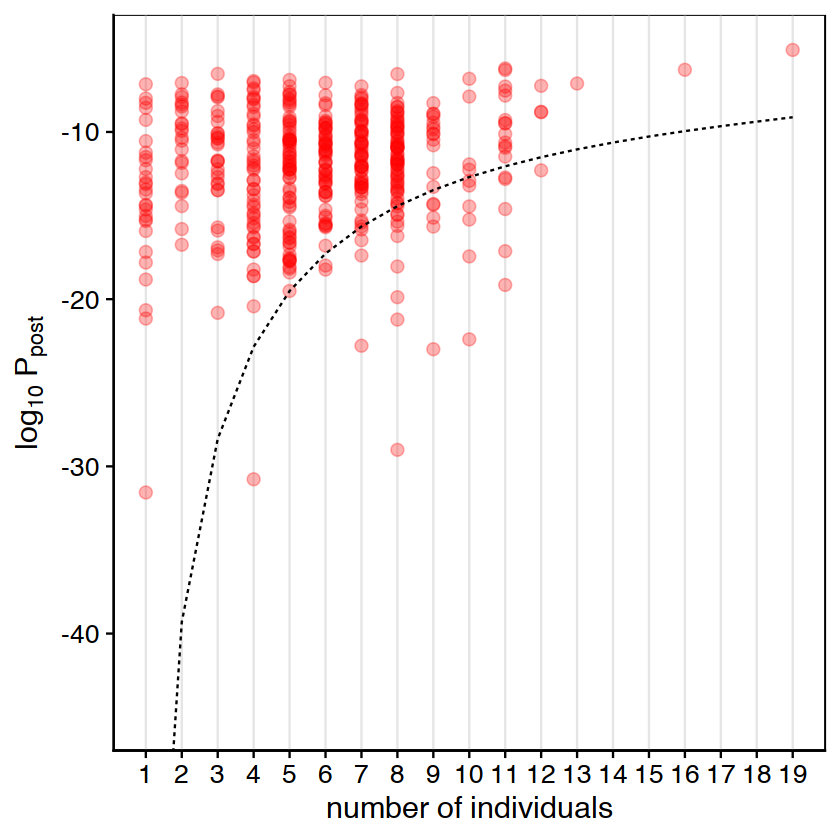

In [3]:
p.allexpanded = qplot(data=d.allexpanded, 
                      size=I(3), x=n, y=ppost, alpha=I(0.3), color=I("red")) +
    labs(x="number of individuals", y=expression(log[10]~P[post])) +
    scale_x_continuous(breaks=1:19) +
    geom_line(data=d.boundary, linetype=2) +    
    theme(panel.grid.major.x = element_line(color="grey90"),
          panel.border=element_rect(color="black")) +
    coord_cartesian(ylim=c(-45,-5))
p.allexpanded

# all lineages + real + sigexp

In [4]:
d.nn = d.all %>% count(n)
cs = d.nn$nn
ci = d.nn$n
d.expand.special = bind_rows(d.expandedsig %>% mutate(type="expanded"), 
                             d.real %>% mutate(type="verified"))

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.



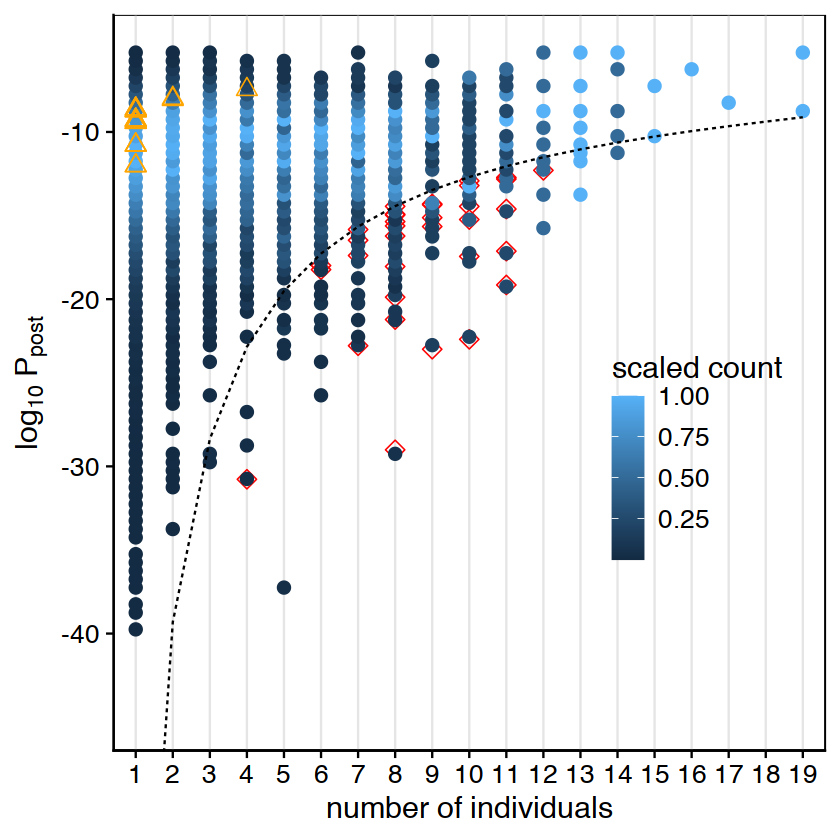

In [5]:
p.all = ggplot(data=d.all, aes(x = factor(n,levels=1:19,ordered=TRUE), y=ppost)) + 
    geom_point(data=d.expandedsig, color="red", size=4, shape=23) +
    stat_bin2d(aes(group=factor(n,levels=1:19,ordered=TRUE), fill = NULL, color = ..ncount..),
               binwidth=c(1,0.5), size=3, geom="point") +
    scale_x_discrete(drop=FALSE) +
    geom_line(data=d.boundary, aes(x=n),linetype=2) +
    #geom_point(data=d.expanded2, color="purple", size=4, shape=22) +
    geom_point(data=d.real, color="orange", size=4, shape=24) +
    labs(x="number of individuals", y=expression(log[10]~P[post]),
        color="scaled count") +
    theme(panel.grid.major.x = element_line(color="grey90"),
           legend.position=c(.7, .4), panel.border=element_rect(color="black")) +
    coord_cartesian(ylim=c(-45,-5))
p.all

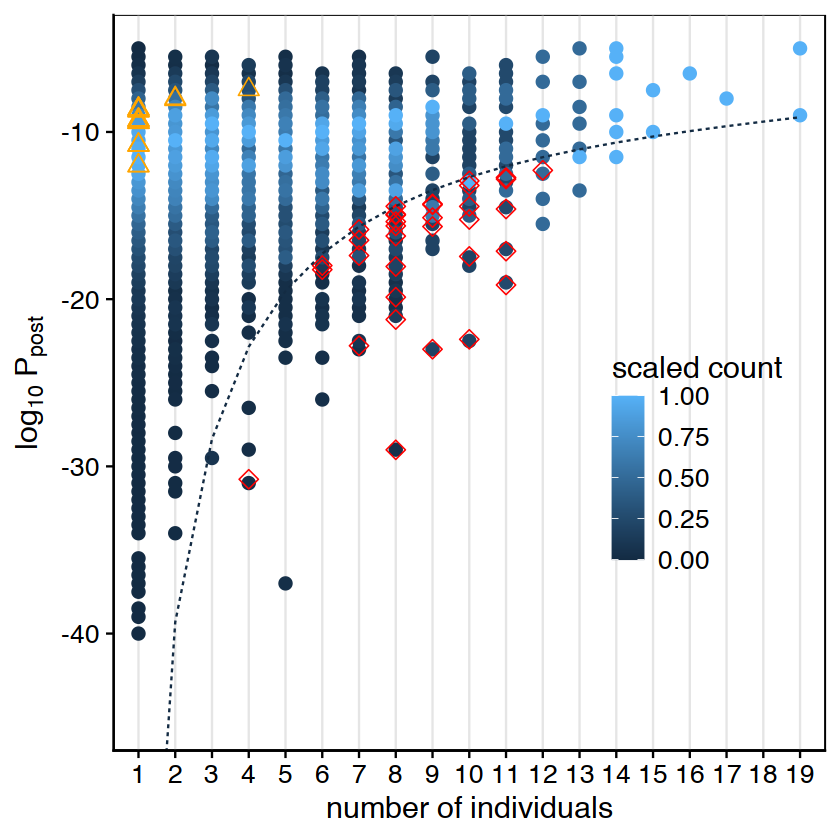

In [6]:
#trace(ggplot2:::guide_grid, edit=TRUE)
p.all = ggplot(data=d.allhist %>% arrange(counts), aes(x = n, y=ppost,color=counts)) + geom_point(size=3) +
    geom_point(data=d.expandedsig, color="red", size=4, shape=23) +
    geom_line(data=d.boundary, aes(x=n),linetype=2) +
    geom_point(data=d.real, color="orange", size=4, shape=24) +
    labs(x="number of individuals", y=expression(log[10]~P[post]),
        color="scaled count") +
    theme(panel.grid.major.x = element_line(color="grey90"),
           legend.position=c(.7, .4), panel.border=element_rect(color="black")) +
    scale_x_continuous(breaks = scales::pretty_breaks(n = 20)) +
    coord_cartesian(ylim=c(-45,-5),x=c(1.2,18.8))
p.all

# healthy

In [7]:
csh = (d.healthy %>% count(n))$nn

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.



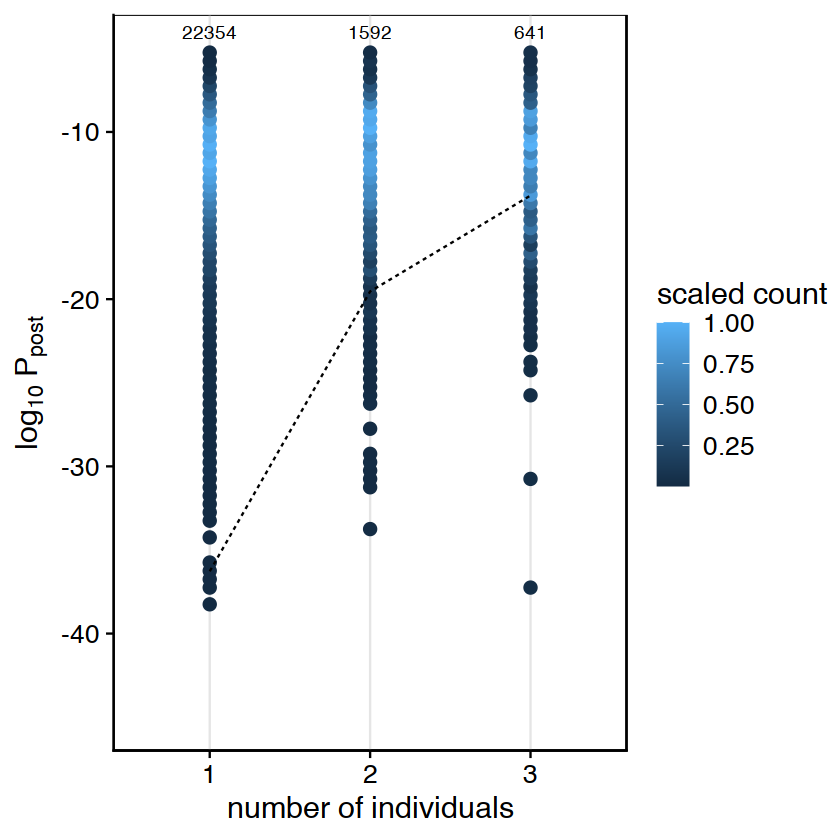

In [8]:
p.healthy = ggplot(data=d.healthy, aes(x=factor(n), y=ppost)) + 
    stat_bin2d(aes(group=factor(n), fill=NULL,color=..ncount..),
               binwidth=c(1,0.5), size=3, geom="point") +
    geom_line(data=d.boundary.healthy, inherit.aes = FALSE,aes(x=n, y=ppost),linetype=2) +
    labs(x="number of individuals", y=expression(log[10]~P[post]),
        color="scaled count") +
    theme(panel.grid.major.x = element_line(color="grey90"),
           panel.border=element_rect(color="black")) +
    annotate("text", x = 1:3, y = -4, label = csh)+
    coord_cartesian(ylim=c(-45,-5))
#save_plot("../github/covid-bcr-ms/figures/sharingHealthy.pdf", p.healthy)
p.healthy

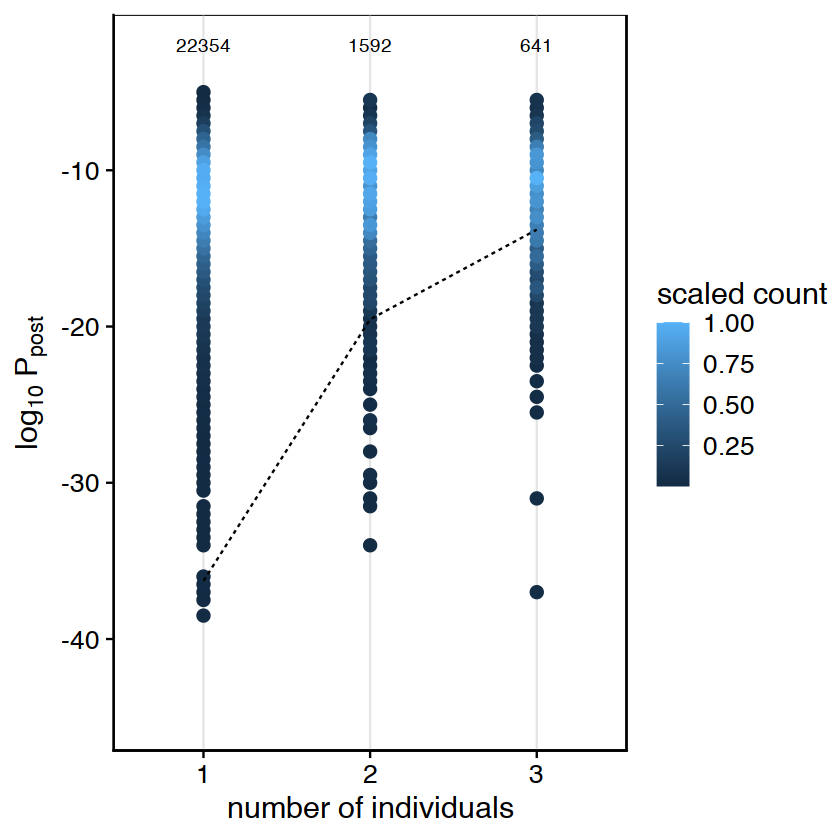

In [9]:
p.healthy = ggplot(data=d.healthyhist %>% arrange(counts), aes(x = n, y=ppost,color=counts)) + geom_point(size=3) +
    geom_line(data=d.boundary.healthy, inherit.aes = FALSE,aes(x=n, y=ppost),linetype=2) +
    labs(x="number of individuals", y=expression(log[10]~P[post]),
        color="scaled count") +
    theme(panel.grid.major.x = element_line(color="grey90"),
           panel.border=element_rect(color="black")) +
    annotate("text", x = 1:3, y = -2, label = csh)+
    coord_cartesian(ylim=c(-45,-2.2),xlim=c(0.6,3.4))
save_plot("./sharingHealthy.pdf", p.healthy)
p.healthy

# combined plot

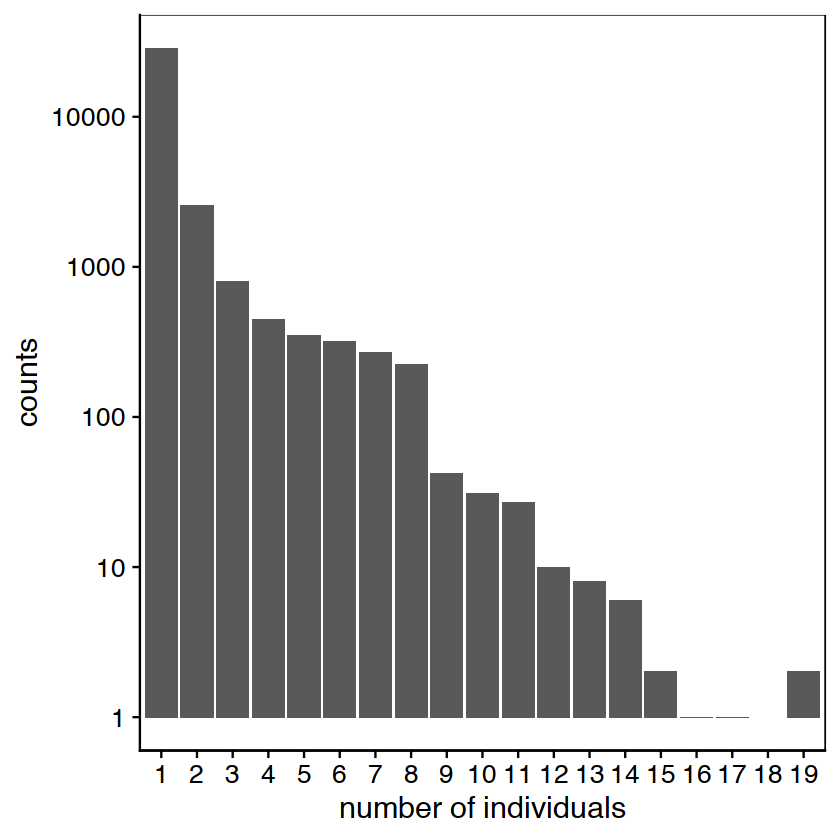

In [10]:
p.hist.all = qplot(data=d.all, x=factor(n,levels=1:19), log="y") +
    scale_x_discrete(drop=FALSE) +
    labs(x="number of individuals", y="counts") 
p.hist.all

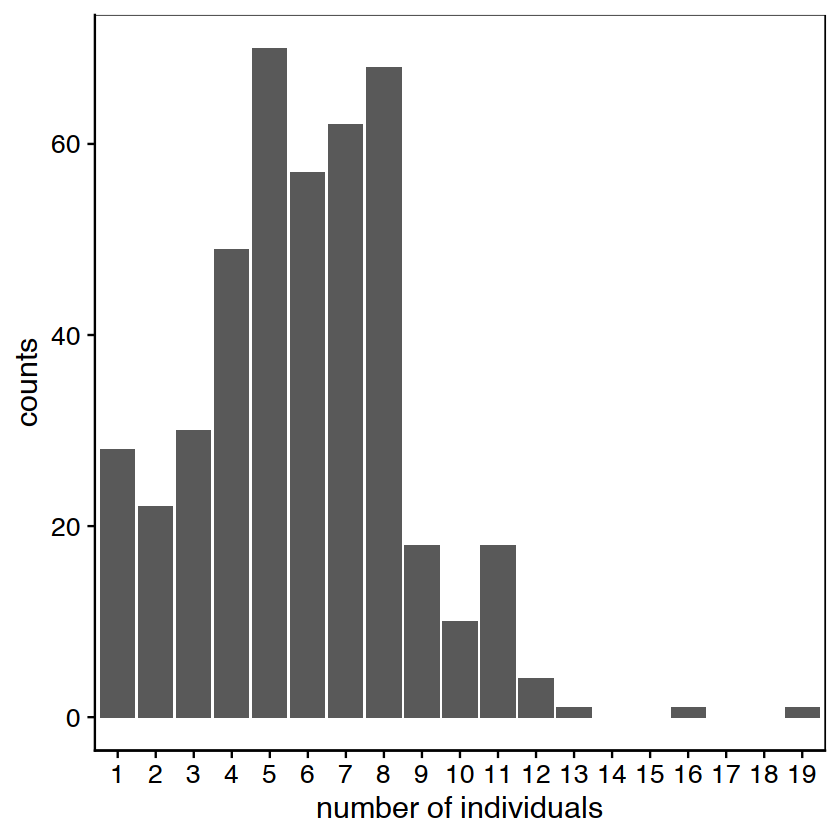

In [11]:
p.hist.exp = qplot(data=d.allexpanded, x=factor(n,levels=1:19)) +
    scale_x_discrete(drop=FALSE) +
    labs(x="number of individuals", y="counts") 
p.hist.exp

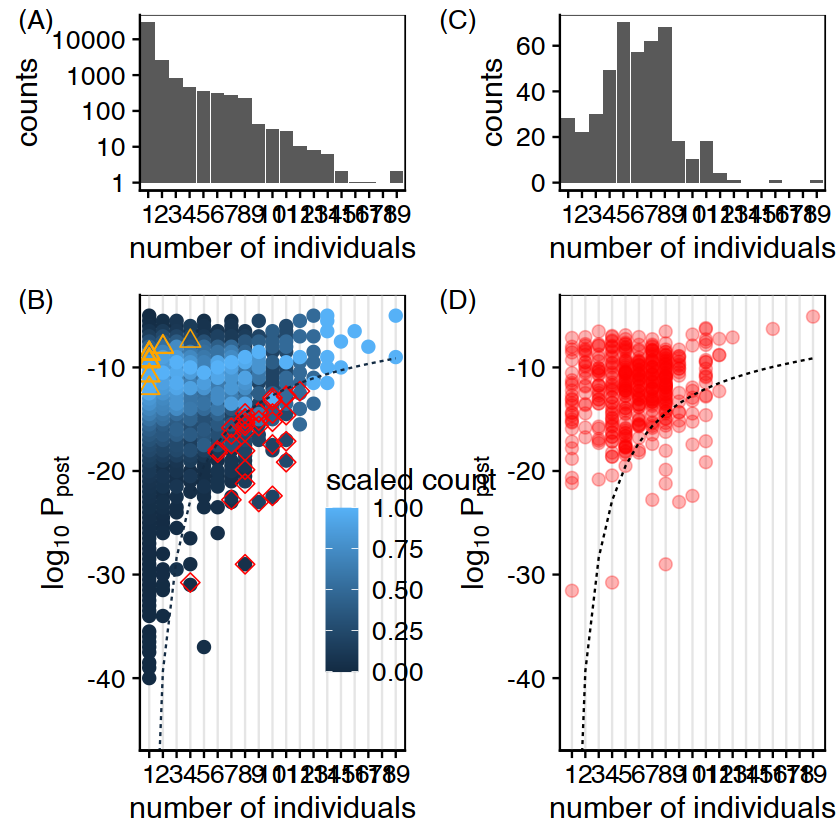

In [12]:
p.sharing = plot_grid(p.hist.all, p.hist.exp, p.all, p.allexpanded,
   align = 'v', axis = 'l', 
             rel_heights=c(1,2), ncol=2, labels=c("(A)","(C)","(B)","(D)"), label_size = 16)
save_plot("./sharing.pdf", p.sharing, ncol=2, nrow=1.7)
p.sharing